<a href="https://colab.research.google.com/github/Devashish-dixit/Customer-Segmentation-in-USA/blob/main/CustomerSegmentationUSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [50]:
pip install -U kaleido

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from scipy.stats.mstats import trimmed_var
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
import plotly.io as pio

pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

## Import

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data/usa.csv")
df.head()

,Unnamed: 0,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,0,1,11,6119.779308,2,75,6,12,4,2,...,5,3,6,3,2,10,6,6,3,3
1,1,1,12,4712.374912,2,75,6,12,4,2,...,5,3,6,3,1,10,5,5,2,2
2,2,1,13,5145.224455,2,75,6,12,4,2,...,5,3,6,3,1,10,5,5,2,2
3,3,1,14,5297.663412,2,75,6,12,4,2,...,5,2,6,2,1,10,4,4,2,2
4,4,1,15,4761.812371,2,75,6,12,4,2,...,5,3,6,3,1,10,5,5,2,2


## Explore

Calculating the proportion of respondents in df that are business owners, and assign the result to the variable pct_biz_owners

In [4]:
prop_biz_owners = df["HBUS"].value_counts(normalize=True)[1]
print("proportion of business owners in df:", prop_biz_owners)

proportion of business owners in df: 0.2755


Creating a DataFrame df_inccat that shows the normalized frequency for income categories for business owners and non-business owners.Answering the question:

Is the distribution of income different for business owners and non-business owners?

In [5]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = df['INCCAT'].replace(inccat_dict).groupby(df['HBUS']).value_counts(normalize=True).rename('frequency').to_frame().reset_index()

df_inccat

,HBUS,INCCAT,frequency
0,0,21-39.9,0.203313
1,0,0-20,0.201242
2,0,60-79.9,0.195307
3,0,40-59.9,0.188682
4,0,90-100,0.108627
5,0,80-89.9,0.102830
6,1,90-100,0.637024
7,1,60-79.9,0.109982
8,1,80-89.9,0.086388
9,1,40-59.9,0.082759


HBUS i.e, have business
; INCCAT i.e, Income Category

 Creating a side-by-side bar chart of df_inccat

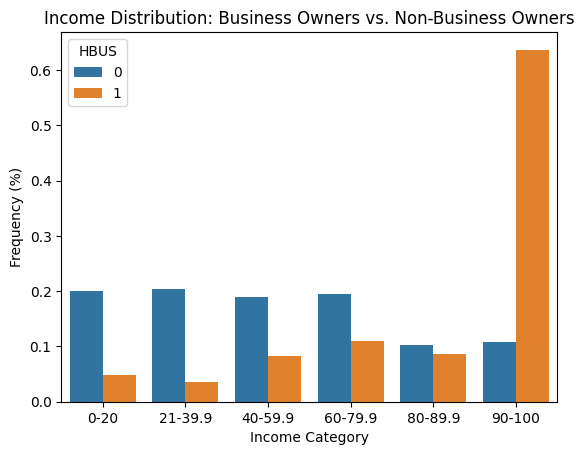

In [6]:
sns.barplot(x='INCCAT',y='frequency',hue='HBUS',data=df_inccat,order=inccat_dict.values())
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Business Owners vs. Non-Business Owners");

0 value for category HBUS represents False

1 value for category HBUS represents True

Creating a scatter plot that shows "HOUSES" vs. "DEBT"

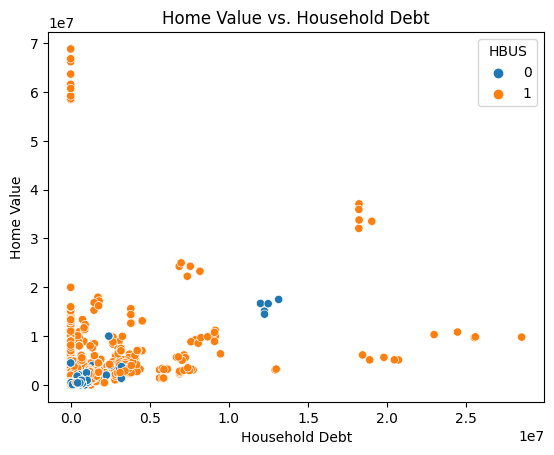

In [7]:
sns.scatterplot(x="DEBT",y="HOUSES",hue="HBUS",data=df)
plt.xlabel("Household Debt")
plt.ylabel("Home Value")
plt.title("Home Value vs. Household Debt");

Creating a new DataFrame df_small_biz that contains only business owners whose income is below $500,000

In [8]:
mask = (df['HBUS'] == 1) & (df['INCOME']<5e5)
df_small_biz = df[mask]
print("df_small_biz shape:", df_small_biz.shape)
df_small_biz.head()

df_small_biz shape: (1529, 352)


,Unnamed: 0,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
80,80,17,171,7802.265717,1,62,4,12,4,1,...,3,5,5,5,2,7,9,9,4,4
81,81,17,172,8247.536301,1,62,4,12,4,1,...,3,5,5,5,2,7,9,9,4,4
82,82,17,173,8169.562719,1,62,4,12,4,1,...,3,5,5,5,2,7,9,9,4,4
83,83,17,174,8087.704517,1,62,4,12,4,1,...,3,5,5,5,2,7,9,9,4,4
84,84,17,175,8276.510048,1,62,4,12,4,1,...,3,5,5,5,2,7,9,9,4,4


Creating a histogram from the "AGE" column in df_small_biz

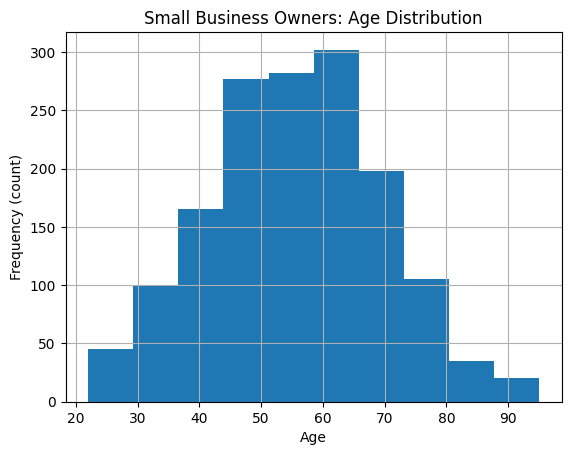

In [9]:
df_small_biz['AGE'].hist(bins = 10)
plt.xlabel("Age")
plt.ylabel("Frequency (count)")
plt.title("Small Business Owners: Age Distribution");

creating a Series top_ten_var with the 10 features with the largest variance

In [10]:
top_ten_var = df_small_biz.var().sort_values().tail(10)
top_ten_var

LIQ         8.552393e+12
FIN         1.848850e+13
ACTBUS      5.820948e+13
BUS         5.962676e+13
KGBUS       7.251622e+13
NHNFIN      8.009237e+13
KGTOTAL     8.533175e+13
NFIN        1.226574e+14
NETWORTH    1.722420e+14
ASSET       1.913038e+14
dtype: float64

Creating a Series top_ten_trim_var with the 10 features with the largest trimmed variance by not including the top and bottom 10% of observations.

In [11]:
top_ten_trim_var = df_small_biz.apply(trimmed_var).sort_values().tail(10)
top_ten_trim_var

EQUITY      1.618966e+11
KGBUS       2.847309e+11
FIN         4.910269e+11
KGTOTAL     6.884340e+11
ACTBUS      7.686339e+11
BUS         7.876312e+11
NHNFIN      1.335122e+12
NFIN        2.266716e+12
NETWORTH    4.516133e+12
ASSET       4.902858e+12
dtype: float64

Creating a horizontal bar chart of top_ten_trim_var

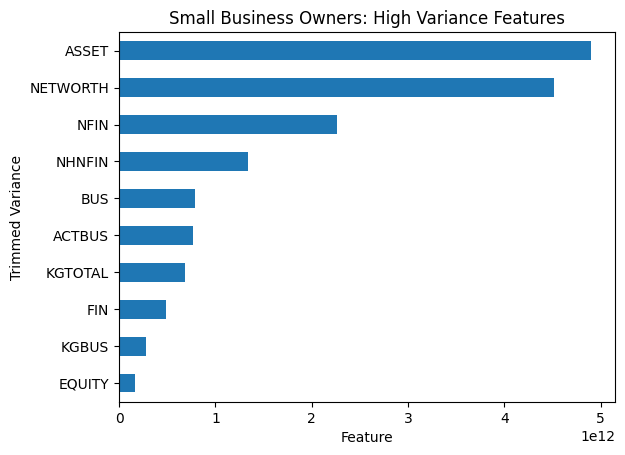

In [12]:
top_ten_trim_var.plot(kind='barh')
plt.xlabel('Feature')
plt.ylabel('Trimmed Variance')
plt.title("Small Business Owners: High Variance Features");

Generating a list of top 5 variance features

In [13]:
high_var_cols = df_small_biz.apply(trimmed_var).sort_values().tail(5).index.to_list()
high_var_cols

['BUS', 'NHNFIN', 'NFIN', 'NETWORTH', 'ASSET']

## Split

Creating the feature matrix

In [14]:
X = df_small_biz[high_var_cols]

## Building Model

#### Hyperparameter Tuning

In [ ]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=k,random_state=42)
    )
    model.fit(X)
    inertia_errors.append(model.named_steps['kmeans'].inertia_)
    silhouette_scores.append(silhouette_score(X,model.named_steps['kmeans'].labels_))

In [16]:
print("Inertia:", inertia_errors[:11])
print()
print("Silhouette Scores:", silhouette_scores[:3])

Inertia: [1707.164664573465, 893.4289630412136, 549.4245878079123, 352.0948521852097, 282.8199185747118, 229.2267934285578, 178.39173012750183, 153.54659891541, 131.97984058798045, 114.37701807815134, 103.66905286620397]

Silhouette Scores: [0.9599099117270491, 0.8316081541602085, 0.8316922747969244]


Creating visualization for identifying the best value of clusters that give optimal silhouette score  and low inertia error

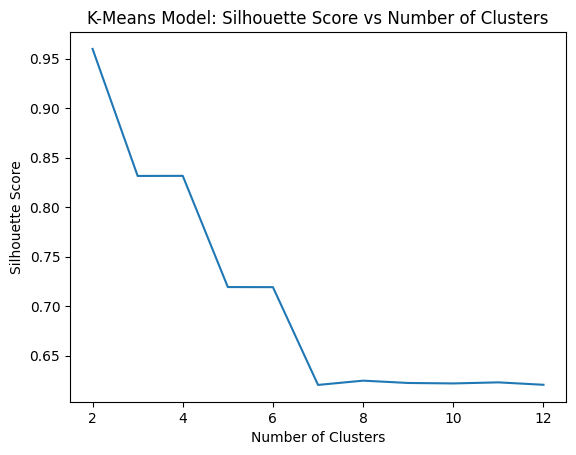

In [17]:
plt.plot(n_clusters,silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("K-Means Model: Silhouette Score vs Number of Clusters");

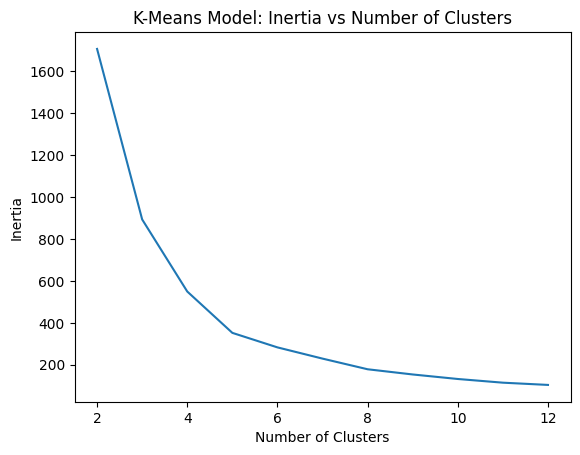

In [18]:
plt.plot(n_clusters,inertia_errors)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia vs Number of Clusters");

The optimal number of clusters should be 3, we put set the random state to 42 for reproducability

In [19]:
final_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=3,random_state=42)
)
final_model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

## Communicating the results

Side by side bar chart for mean values that shows the mean of the features in X for each of the clusters

In [20]:
labels = final_model.named_steps['kmeans'].labels_
xgb = X.groupby(labels).mean()
xgb

,BUS,NHNFIN,NFIN,NETWORTH,ASSET
0,7.509516e+05,1.012893e+06,1.564817e+06,2.282148e+06,2.502621e+06
1,6.666641e+07,8.015551e+07,1.001982e+08,1.252273e+08,1.321805e+08
2,1.258849e+07,1.662274e+07,1.929993e+07,2.061528e+07,2.181869e+07


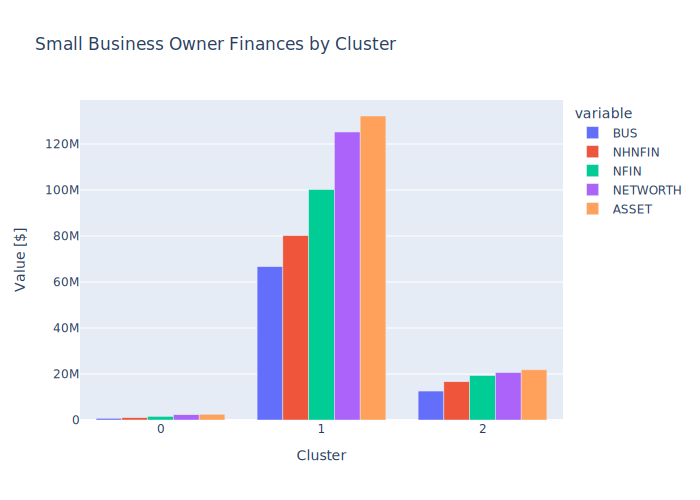

In [21]:
fig = px.bar(xgb,barmode='group',title="Small Business Owner Finances by Cluster")
fig.update_layout(xaxis_title="Cluster",yaxis_title="Value [$]")
fig.show(renderer="svg")

Creating a PCA transformer, use it to reduce the dimensionality of the data in X to 2

In [22]:
pca = PCA(n_components=2,random_state=42)
X_t = pca.fit_transform(X)
X_pca = pd.DataFrame(X_t,columns=['PC1','PC2'])
print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca shape: (1529, 2)


,PC1,PC2
0,-6.898676e+06,-552318.135332
1,-6.900559e+06,-552416.462767
2,-6.898676e+06,-552318.135332
3,-6.902968e+06,-553020.771933
4,-6.900033e+06,-551910.481037


Creating a scatter plot of X_pca to demostrate clustering performed by our model

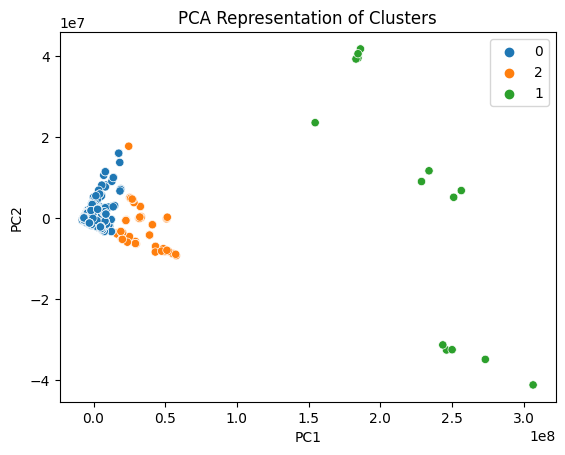

In [24]:
sns.scatterplot(x='PC1',y='PC2',hue=labels.astype(str),data=X_pca)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Representation of Clusters");

*In this Jupyter Notebook analysis, we embarked on a comprehensive exploration of a dataset, aiming to derive valuable insights. We began by calculating the proportion of respondents who are business owners and subsequently investigated the distribution of income among business owners and non-business owners. The creation of a side-by-side bar chart provided a visual representation of this comparison. Additionally, we delved into relationships between variables, showcasing the correlation between "HOUSES" and "DEBT" through a scatter plot. To gain a better understanding of age distribution, a histogram was generated specifically for business owners with income below $500,000. We proceeded to identify the optimal number of clusters for our data, arriving at three as the ideal choice based on silhouette score and inertia error visualizations. These clusters were then used to compute mean values for various features, further visualized through a side-by-side bar chart. Additionally, we harnessed PCA to reduce data dimensionality to two principal components and illustrated the clustering results using a scatter plot. Overall, this analysis provides valuable insights into our dataset and aids in understanding key relationships and patterns within the data.*